In [18]:
import sys
import heapq
import zipfile
from io import TextIOWrapper

def manhattan_distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def normalized_edge(cost, u, v):
    return (cost, min(u, v), max(u, v))

def prim_mst_heap(coordinates):
    n = len(coordinates)
    if n <= 1:
        return [], 0

    total_cost = 0
    in_mst = [False] * n
    min_heap = []
    mst_edges = []

    in_mst[0] = True
    for i in range(1, n):
        cost = manhattan_distance(coordinates[0], coordinates[i])
        heapq.heappush(min_heap, (cost, 0, i))

    edges_added = 0
    while edges_added < n - 1 and min_heap:
        cost, frm, to = heapq.heappop(min_heap)
        if not in_mst[to]:
            in_mst[to] = True
            total_cost += cost
            mst_edges.append(normalized_edge(cost, frm, to))
            edges_added += 1

            for i in range(n):
                if not in_mst[i]:
                    new_cost = manhattan_distance(coordinates[to], coordinates[i])
                    heapq.heappush(min_heap, (new_cost, to, i))

    return mst_edges, total_cost


def prim_mst_array(coordinates):
    n = len(coordinates)
    if n <= 1:
        return 0
    total_cost = 0
    in_mst = [False] * n
    min_edge = [float('inf')] * n
    min_edge[0] = 0
    for _ in range(n):
        next_node = -1
        min_cost = float('inf')
        for i in range(n):
            if not in_mst[i] and min_edge[i] < min_cost:
                min_cost = min_edge[i]
                next_node = i
        if next_node == -1:
            break
        in_mst[next_node] = True
        total_cost += min_cost
        for j in range(n):
            if not in_mst[j]:
                cost = manhattan_distance(coordinates[next_node], coordinates[j])
                if cost < min_edge[j]:
                    min_edge[j] = cost
    return total_cost


class UnionFind:
    def __init__(self, size):
        self.parent = list(range(size))
        self.rank = [0] * size
    
    def find(self, p):
        if self.parent[p] != p:
            self.parent[p] = self.find(self.parent[p])
        return self.parent[p]
    
    def union(self, p, q):
        rootP = self.find(p)
        rootQ = self.find(q)
        if rootP != rootQ:
            if self.rank[rootP] < self.rank[rootQ]:
                self.parent[rootP] = rootQ
            elif self.rank[rootP] > self.rank[rootQ]:
                self.parent[rootQ] = rootP
            else:
                self.parent[rootQ] = rootP
                self.rank[rootP] += 1

def find_second_mst(coordinates):
    original_mst, original_cost = prim_mst_heap(coordinates)
    if not original_mst:
        return -1 

    n = len(coordinates)
    all_edges = [normalized_edge(manhattan_distance(coordinates[i], coordinates[j]), i, j)
                 for i in range(n) for j in range(i + 1, n)]
    all_edges.sort()

    second_mst_cost = float('inf')

    for removed_edge in original_mst:
        uf = UnionFind(n)
        for edge in original_mst:
            if edge != removed_edge:
                uf.union(edge[1], edge[2])

        candidate_edge = None
        for e in all_edges:
            if e == removed_edge:
                continue
            if uf.find(e[1]) != uf.find(e[2]):
                candidate_edge = e
                break
                
        if candidate_edge is not None:
            candidate_cost = original_cost - removed_edge[0] + candidate_edge[0]
            if candidate_cost < second_mst_cost and candidate_cost != original_cost:
                second_mst_cost = candidate_cost

    return second_mst_cost if second_mst_cost != float('inf') else -1


def read_coordinates(file):
    n = int(file.readline().strip())
    coordinates = [tuple(map(int, file.readline().strip().split())) for _ in range(n)]
    return coordinates

def process_zip(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        filenames = sorted(z.namelist(), key=lambda f: int(f.split('.')[0]))
        for filename in filenames:
            with z.open(filename) as file:
                file = TextIOWrapper(file)  # Convert byte stream to text
                coordinates = read_coordinates(file)
                _, mst_cost_heap = prim_mst_heap(coordinates)
                mst_cost_array = prim_mst_array(coordinates)
                mst_second_cost = find_second_mst(coordinates)
                print(f"{filename}:\nMST cost (Heap): {mst_cost_heap}\nMST cost (Array): {mst_cost_array}\nSecond MST cost: {mst_second_cost}\n---")

zip_path = "C:/Users/kenz2/OneDrive/Documents/GaTech MS in CSE/Algorithms/HW2/HW2Q3_inputs.zip"

process_zip(zip_path)




1.txt:
MST cost (Heap): 713
MST cost (Array): 713
Second MST cost: 714
---
2.txt:
MST cost (Heap): 515
MST cost (Array): 515
Second MST cost: 517
---
3.txt:
MST cost (Heap): 796
MST cost (Array): 796
Second MST cost: 797
---
4.txt:
MST cost (Heap): 643
MST cost (Array): 643
Second MST cost: 646
---
5.txt:
MST cost (Heap): 823
MST cost (Array): 823
Second MST cost: 825
---
6.txt:
MST cost (Heap): 683
MST cost (Array): 683
Second MST cost: 685
---
7.txt:
MST cost (Heap): 627
MST cost (Array): 627
Second MST cost: 628
---
8.txt:
MST cost (Heap): 587
MST cost (Array): 587
Second MST cost: 589
---
9.txt:
MST cost (Heap): 653
MST cost (Array): 653
Second MST cost: 655
---
10.txt:
MST cost (Heap): 679
MST cost (Array): 679
Second MST cost: 680
---
11.txt:
MST cost (Heap): 715
MST cost (Array): 715
Second MST cost: 719
---
12.txt:
MST cost (Heap): 701
MST cost (Array): 701
Second MST cost: 702
---
13.txt:
MST cost (Heap): 555
MST cost (Array): 555
Second MST cost: 560
---
14.txt:
MST cost (Hea

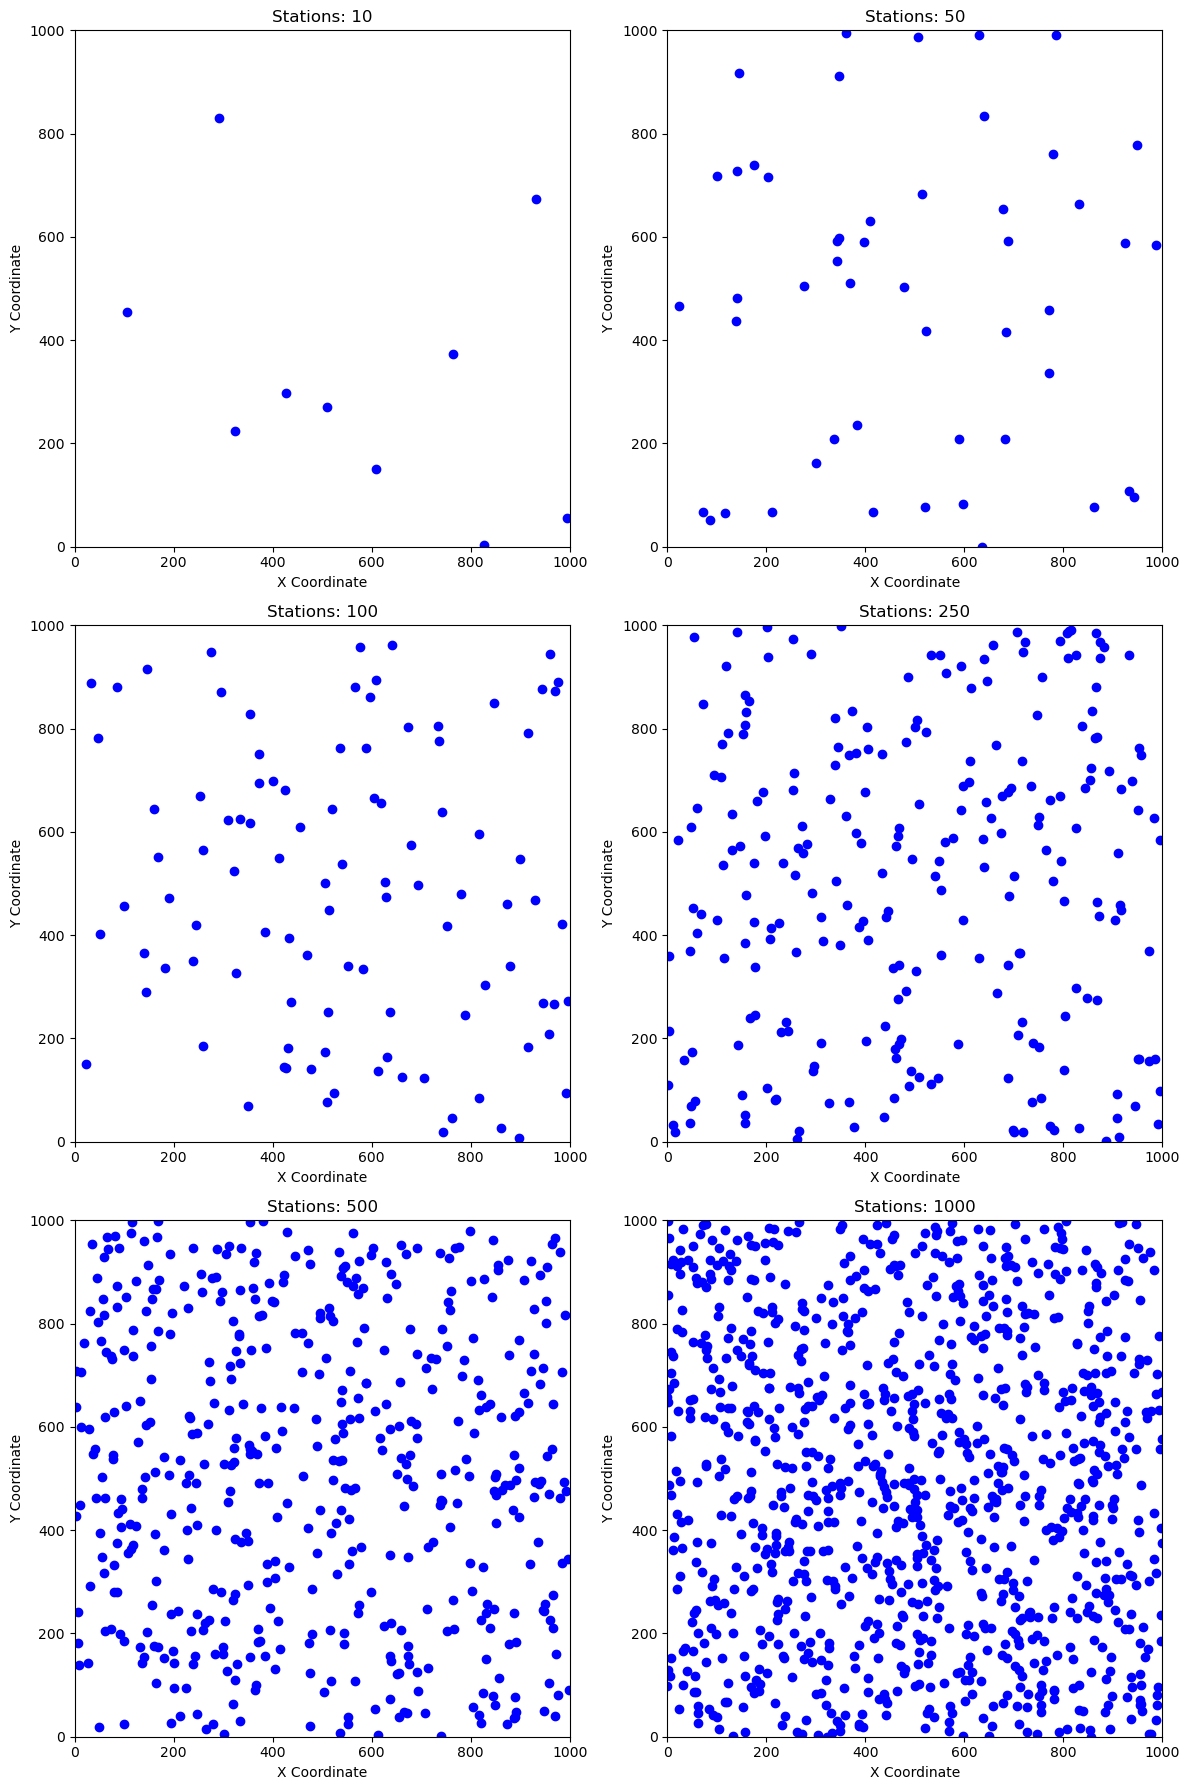

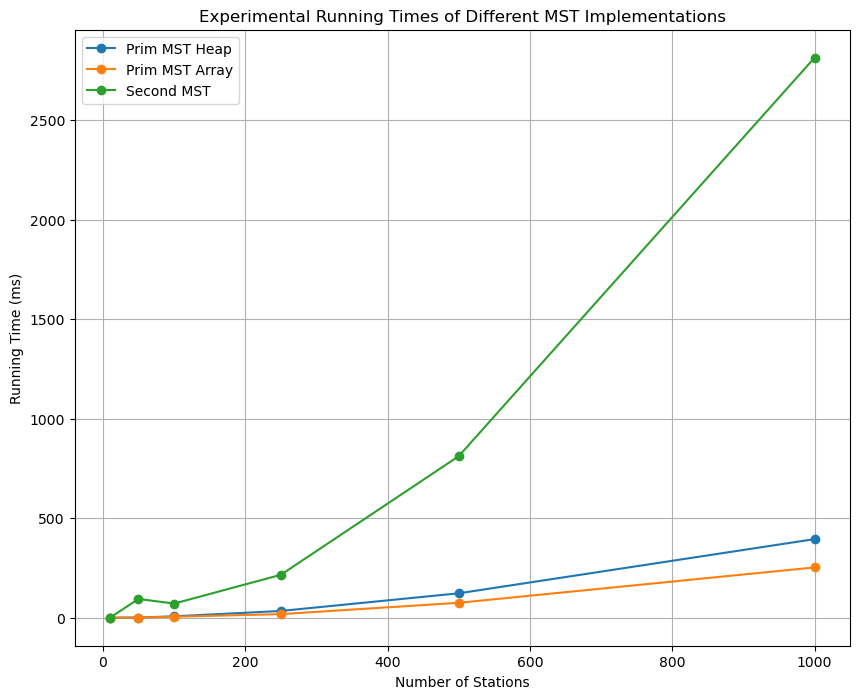

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import time


def generate_random_coordinates(n):
    return [(np.random.randint(0, 1000), np.random.randint(0, 1000)) for _ in range(n)]


input_sizes = [10, 50, 100, 250, 500, 1000]
times_heap = []
times_array = []
times_second_mst = []


fig, axs = plt.subplots(3, 2, figsize=(12, 18)) 
axs = axs.flatten()

for i, size in enumerate(input_sizes):
    coordinates = generate_random_coordinates(size)
    x_vals, y_vals = zip(*coordinates)
    axs[i].scatter(x_vals, y_vals, c='blue', marker='o')
    axs[i].set_title(f'Stations: {size}')
    axs[i].set_xlim(0, 1000)
    axs[i].set_ylim(0, 1000)
    axs[i].set_xlabel('X Coordinate')
    axs[i].set_ylabel('Y Coordinate')
    
    start_time = time.time()
    prim_mst_heap(coordinates)
    times_heap.append((time.time() - start_time) * 1000) 

    start_time = time.time()
    prim_mst_array(coordinates)
    times_array.append((time.time() - start_time) * 1000)

    start_time = time.time()
    find_second_mst(coordinates)
    times_second_mst.append((time.time() - start_time) * 1000)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(input_sizes, times_heap, label='Prim MST Heap', marker='o')
plt.plot(input_sizes, times_array, label='Prim MST Array', marker='o')
plt.plot(input_sizes, times_second_mst, label='Second MST', marker='o')
plt.xlabel('Number of Stations')
plt.ylabel('Running Time (ms)')
plt.title('Experimental Running Times of Different MST Implementations')
plt.legend()
plt.grid(True)
plt.show()


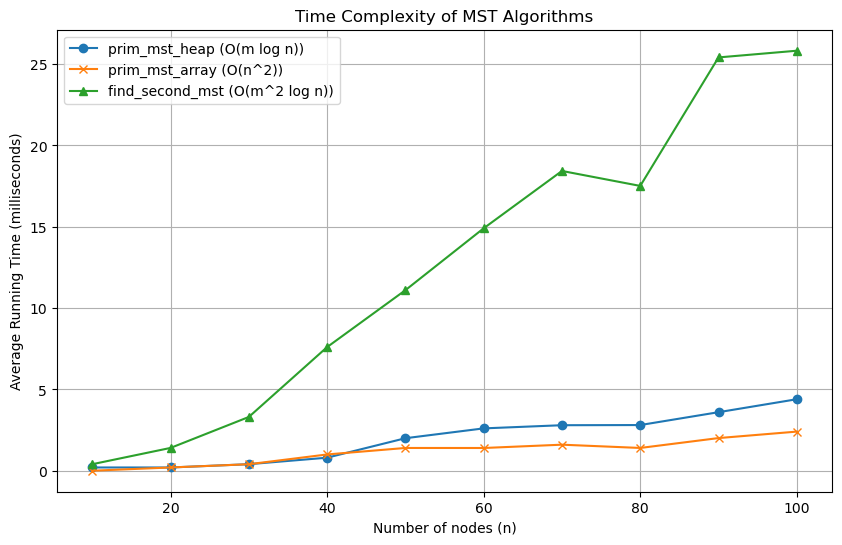

In [30]:
import numpy as np
import time
import matplotlib.pyplot as plt
from itertools import combinations
import random

def generate_random_graph(n, density=0.5):
    points = [(random.randint(1, 100), random.randint(1, 100)) for _ in range(n)]
    edges = []
    for (i, j) in combinations(range(n), 2):
        if random.random() < density:
            distance = manhattan_distance(points[i], points[j])
            edges.append((distance, i, j))
    return points, edges

def measure_time(func, *args):
    start = time.time()
    result = func(*args)
    end = time.time()
    return (end - start) * 1000, result  # Convert to milliseconds

def plot_results(sizes, times_heap, times_array, times_second_mst):
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times_heap, label='prim_mst_heap (O(m log n))', marker='o')
    plt.plot(sizes, times_array, label='prim_mst_array (O(n^2))', marker='x')
    plt.plot(sizes, times_second_mst, label='find_second_mst (O(m^2 log n))', marker='^')
    plt.xlabel('Number of nodes (n)')
    plt.ylabel('Average Running Time (milliseconds)')
    plt.title('Time Complexity of MST Algorithms')
    plt.legend()
    plt.grid(True)
    plt.show()

# Constants
NUM_RUNS = 5
MAX_VERTICES = 100
STEP = 10

sizes = list(range(10, MAX_VERTICES + 1, STEP))
times_heap = []
times_array = []
times_second_mst = []

for n in sizes:
    temp_heap = []
    temp_array = []
    temp_second_mst = []
    for _ in range(NUM_RUNS):
        points, _ = generate_random_graph(n)
        t_heap, _ = measure_time(prim_mst_heap, points)
        t_array = measure_time(prim_mst_array, points)[0]
        t_second_mst = measure_time(find_second_mst, points)[0]
        temp_heap.append(t_heap)
        temp_array.append(t_array)
        temp_second_mst.append(t_second_mst)
    times_heap.append(np.mean(temp_heap))
    times_array.append(np.mean(temp_array))
    times_second_mst.append(np.mean(temp_second_mst))

plot_results(sizes, times_heap, times_array, times_second_mst)
